# Multiple Regression Analysis Notebook

This notebook performs multiple regression analysis on fields in a dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Load the file and clean the data

In [3]:
# Replace 'your_dataset.csv' with the path to your dataset
file_path = 'datasets/student_preferences_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Age,Gender,Grade Level,Major,Socioeconomic Status,Language Proficiency,Learning Style,Course Format,Interaction Type,Engagement Level,...,Time Spent on Homework,Time Spent on Additional Learning,Study Environment,Technological Access,Grades,Test Scores,Course Completion Rates,Learning Style Preference,Course Format Preference,Preference Uncertainty
0,24,Male,4,Computer Science,Low,Intermediate,Visual,In-person,Discussions,Low,...,3,7,Home,Good,76,88,87,Visual,In-person,Highly Certain
1,21,Male,2,Computer Science,Low,Basic,Visual,Online,Lectures,Moderate,...,6,3,Home,Good,99,76,67,Auditory,In-person,Highly Certain
2,22,Female,3,Computer Science,High,Intermediate,Kinesthetic,Online,Lectures,High,...,6,4,Home,Good,72,93,84,Auditory,In-person,Highly Certain
3,24,Male,4,Computer Science,High,Intermediate,Visual,In-person,Group Work,Moderate,...,8,6,Library,Average,73,98,69,Auditory,In-person,Moderately Certain
4,20,Female,2,Computer Science,Medium,Intermediate,Kinesthetic,Hybrid,Discussions,Moderate,...,8,6,Library,Good,50,63,73,Kinesthetic,Online,Highly Certain


## Step 2: Specify variables and perform Cross-Validation

In [31]:
# Select features and target (modify column names as needed)
features = ['Previous Courses Taken', 'Satisfaction with Past Courses', 'Time Spent on Homework', 'Time Spent on Additional Learning', 
            'Test Scores', 'Course Completion Rates']  # Replace with actual feature column names
target = 'Grades'  # Replace with the target variable name

X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso with Cross-Validation to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=10, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha:.5f}")

Best alpha: 10.00000


## Step 3: Run Lasso Regression

In [32]:
# Train final Lasso model with best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"R-squared (R²): {r2:.5f}")

# Coefficients
coef_df = pd.DataFrame({'Feature': ['Intercept'] + features, 'Coefficient': [lasso.intercept_] + list(lasso.coef_)})
print("\nLasso Coefficients:")
print(coef_df)

Mean Squared Error (MSE): 207.82427
R-squared (R²): -0.00015

Lasso Coefficients:
                             Feature  Coefficient
0                          Intercept     74.48836
1             Previous Courses Taken      0.00000
2     Satisfaction with Past Courses     -0.00000
3             Time Spent on Homework     -0.00000
4  Time Spent on Additional Learning      0.00000
5                        Test Scores     -0.00000
6            Course Completion Rates     -0.00000


## Step 4: Plot feature importance

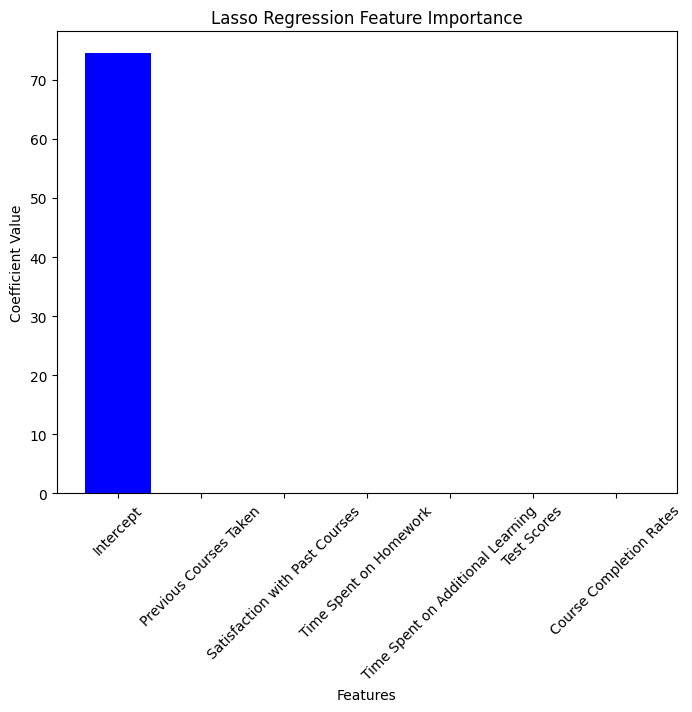

In [33]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Feature Importance")
plt.xticks(rotation=45)
plt.show()